In [ ]:
import tensorflow as tf
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.python.framework import ops

print(tf.__version__)


1.5.0


In [30]:
fashion_mnist = input_data.read_data_sets('input/data', one_hot=True) 


Extracting input/data\train-images-idx3-ubyte.gz


Extracting input/data\train-labels-idx1-ubyte.gz
Extracting input/data\t10k-images-idx3-ubyte.gz
Extracting input/data\t10k-labels-idx1-ubyte.gz


In [46]:
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))
print("")
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))
print("")
labels = sum(fashion_mnist.train.labels)
print("Count of data: \n{labels}".format(labels=labels))


Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)

Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)

Count of data: 
[5444. 6179. 5470. 5638. 5307. 4987. 5417. 5715. 5389. 5454.]


In [57]:
label_dict = {
    0: 'Zero', 
    1: 'One',
    2: 'Two',
    3: 'Three',
    4: 'Four',
    5: 'Five',
    6: 'Six',
    7: 'Seven',
    8: 'Eight',
    9: 'Nine'
}


y = 1 (One)


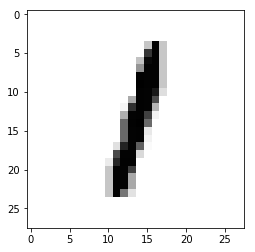

In [58]:
x = 23
sample_1 = fashion_mnist.train.images[x].reshape(28, 28)
sample_label_1 = np.where(fashion_mnist.train.labels[x] == 1)[0][0]
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')

# for i in range(len(traffic_signs)):
#     plt.subplot(1, 4, i + 1)
#     plt.axis('off')
#     plt.imshow(images[traffic_signs[i]])
#     plt.subplots_adjust(wspace=0.5)
#     print("shape: {0}, min: {1}, max: {2}".format(
#         images[traffic_signs[i]].shape, images[traffic_signs[i]].min(), images[traffic_signs[i]].max()))
# plt.show()


In [60]:
n_hidden_1 = 128
n_hidden_2 = 128
n_input = 784
n_classes = 10
n_samples = fashion_mnist.train.num_examples 

In [65]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    return X, Y


In [66]:
def initialize_parameters():
    tf.set_random_seed(42)
    
    W1 = tf.get_variable("W1", [n_hidden_1, n_input], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b1 = tf.get_variable("b1", [n_hidden_1, 1], initializer=tf.zeros_initializer())
    
    W2 = tf.get_variable("W2", [n_hidden_2, n_hidden_1], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b2 = tf.get_variable("b2", [n_hidden_2, 1], initializer=tf.zeros_initializer())
    
    W3 = tf.get_variable("W3", [n_classes, n_hidden_2], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b3 = tf.get_variable("b3", [n_classes, 1], initializer=tf.zeros_initializer())
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    return parameters


In [67]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.add(tf.matmul(W1,X), b1)     
    A1 = tf.nn.relu(Z1)                  
    Z2 = tf.add(tf.matmul(W2,A1), b2)    
    A2 = tf.nn.relu(Z2)                  
    Z3 = tf.add(tf.matmul(W3,A2), b3)    
    return Z3


In [68]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    return cost


In [71]:
def model(train, test, learning_rate=0.0001, num_epochs=16, minibatch_size=32, print_cost=True, graph_filename='costs'):
    ops.reset_default_graph()
    tf.set_random_seed(42)
    seed = 42
    (n_x, m) = train.images.T.shape
    n_y = train.labels.T.shape[0]
    costs = []
    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            for i in range(num_minibatches):
                minibatch_X, minibatch_Y = train.next_batch(minibatch_size)
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X.T, Y: minibatch_Y.T})
                epoch_cost += minibatch_cost / num_minibatches
            if print_cost == True:
                print("Cost after epoch {epoch_num}: {cost}".format(epoch_num=epoch, cost=epoch_cost))
                costs.append(epoch_cost)
        
        plt.figure(figsize=(16,5))
        plt.plot(np.squeeze(costs), color='#2A688B')
        plt.xlim(0, num_epochs-1)
        plt.ylabel("cost")
        plt.xlabel("iterations")
        plt.title("learning rate = {rate}".format(rate=learning_rate))
        plt.savefig(graph_filename, dpi=300)
        plt.show()
        parameters = sess.run(parameters)
        print("Parameters have been trained!")
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("Train Accuracy:", accuracy.eval({X: train.images.T, Y: train.labels.T}))
        print("Test Accuracy:", accuracy.eval({X: test.images.T, Y: test.labels.T}))
    return parameters


In [1]:
train = fashion_mnist.train
test = fashion_mnist.test

parameters = model(train, test, learning_rate=0.0005)


NameError: name 'fashion_mnist' is not defined